<a href="https://colab.research.google.com/github/rhysdg/sam-at-a-clip/blob/main/notebooks/siglip_onnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Installation

In [1]:
!git clone https://github.com/rhysdg/sam-at-a-clip.git

Cloning into 'sam-at-a-clip'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 243 (delta 33), reused 22 (delta 17), pack-reused 175
Receiving objects: 100% (243/243), 11.50 MiB | 17.37 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [ ]:
%cd sam-at-a-clip
!pip install -r requirements.txt

In [3]:
!ls

clip  images  notebooks  README.md  requirements.txt  sam  tests


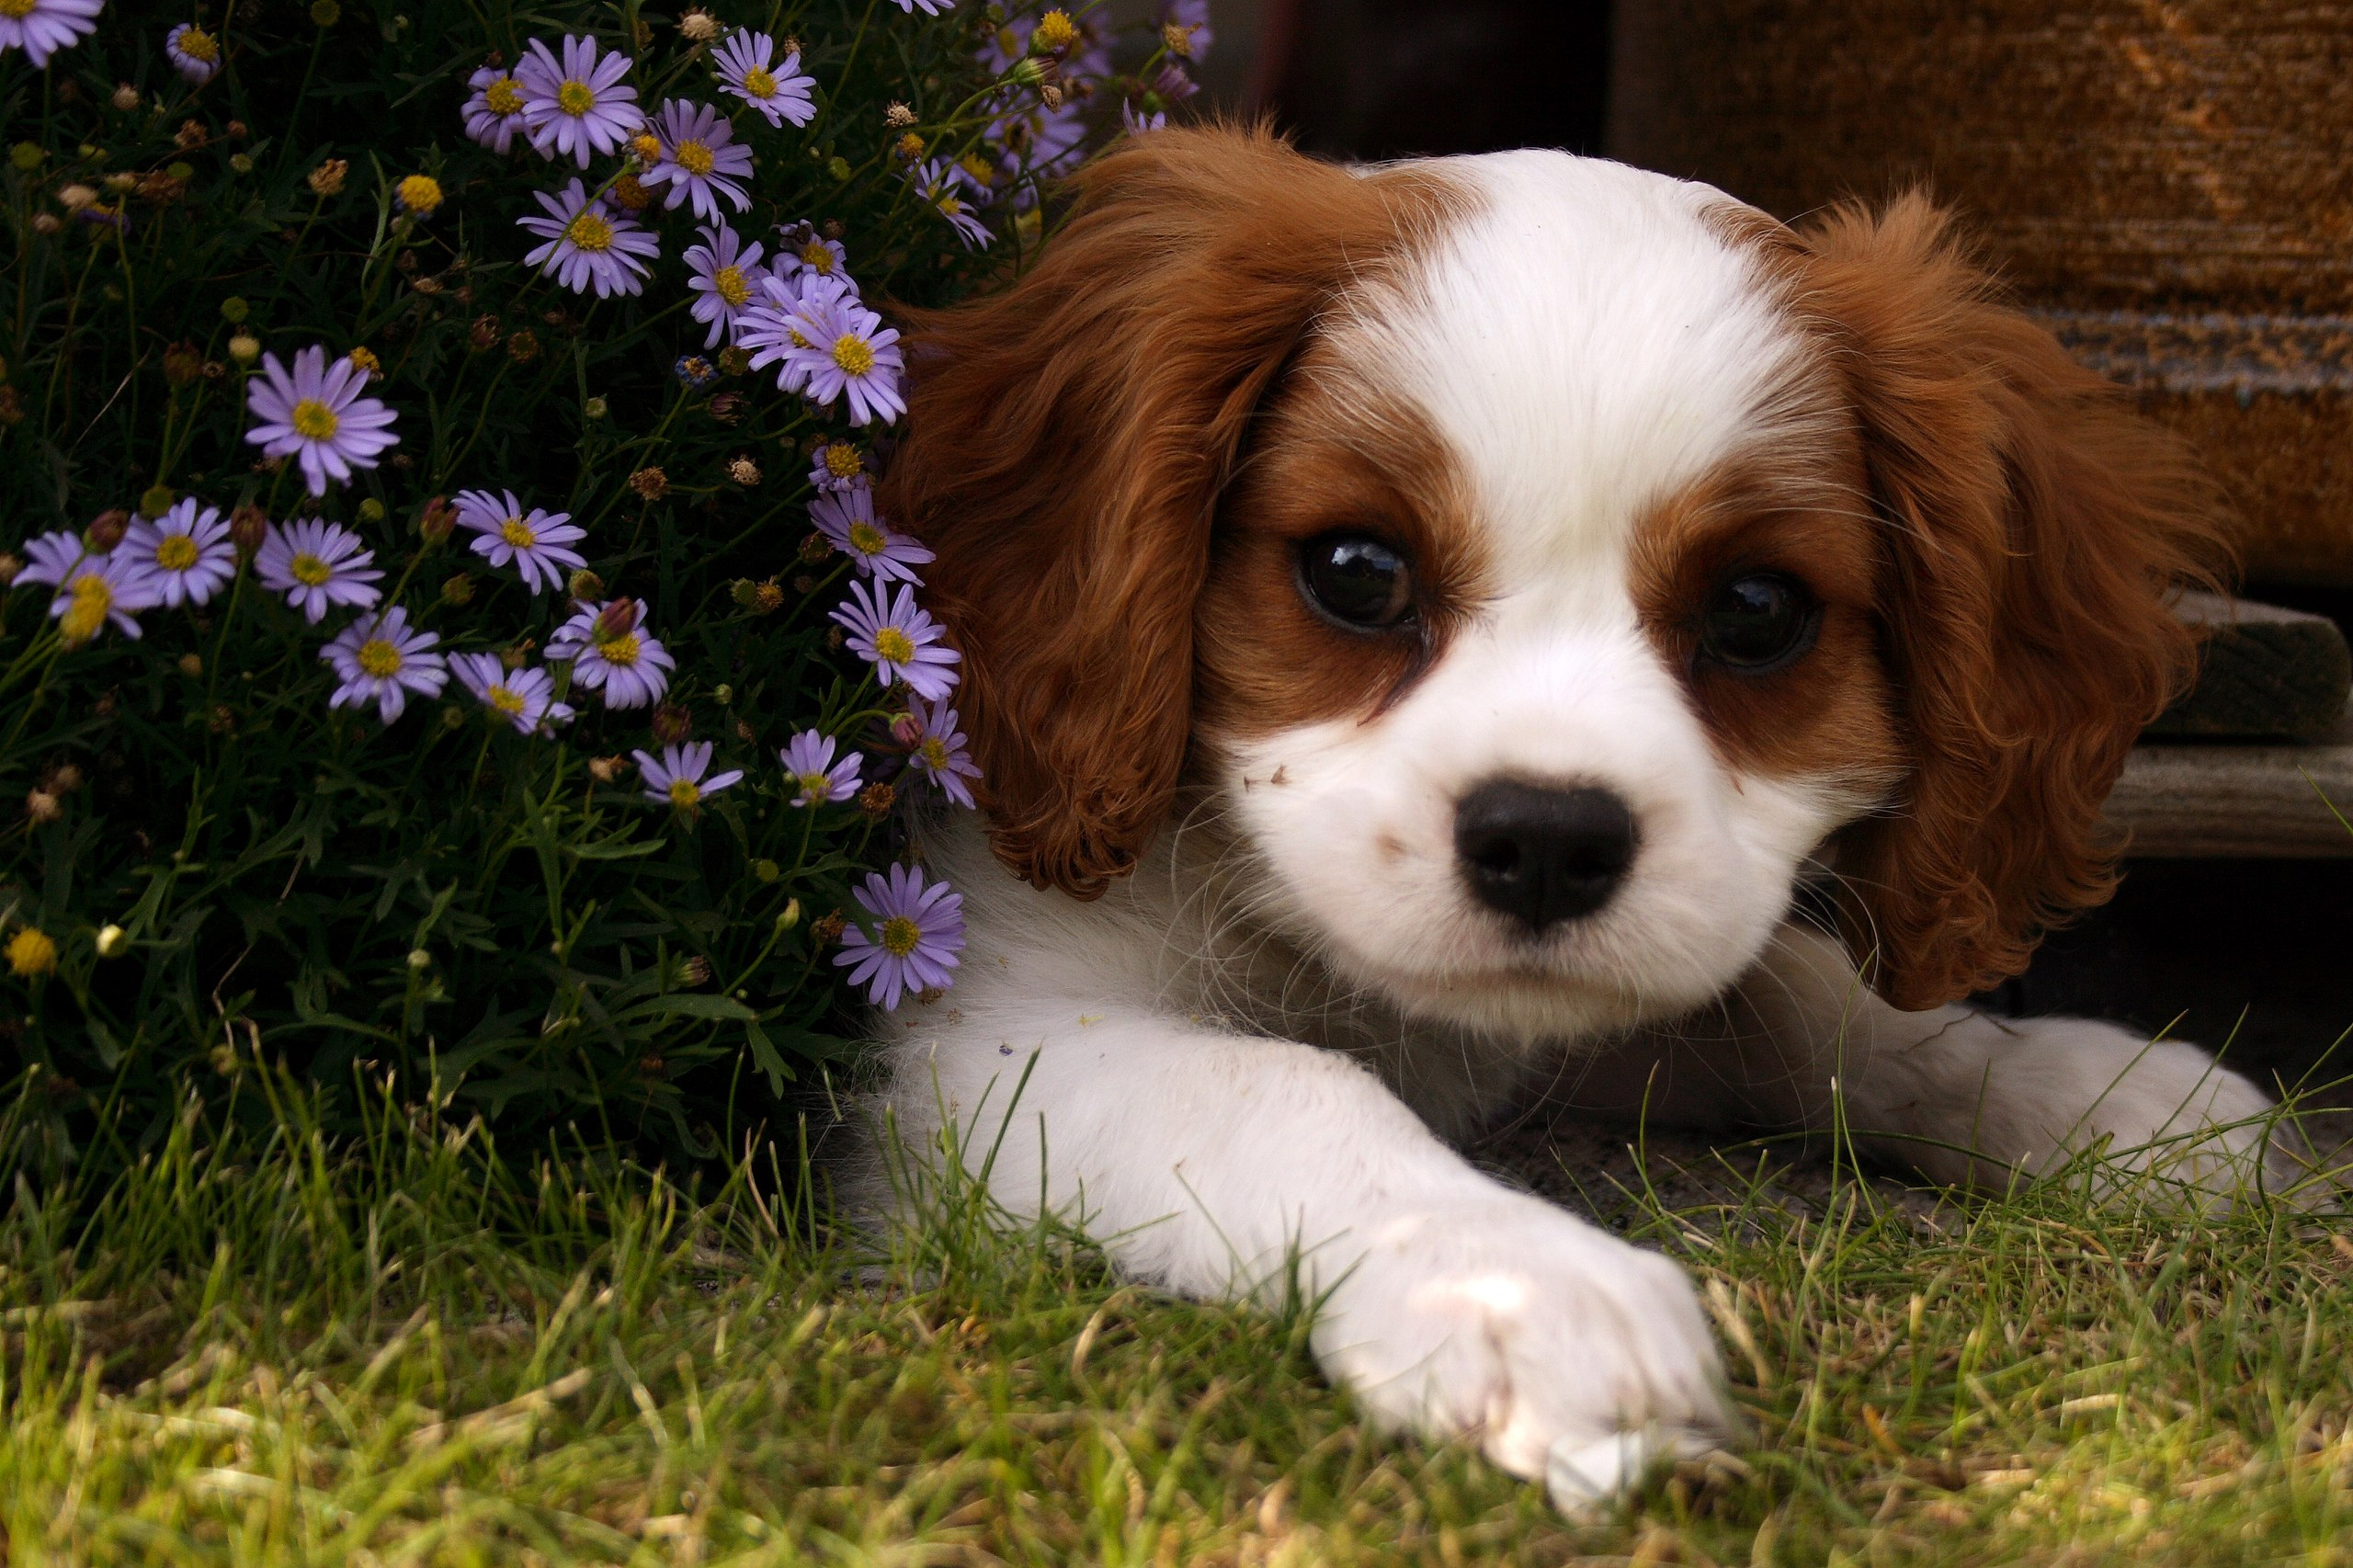

In [4]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/sam-at-a-clip/clip/data/dog.jpg')
cv2_imshow(img)

#Inference

Note that work is underway to remmove the dependency on the Hugginface AutoTokenizer here. This is a SigLIP only scenario currently and doesn't apply to CLIP


## Option 1

In [2]:
%cd /content/sam-at-a-clip/
from PIL import Image
from clip.model import OnnxClip, softmax, get_similarity_scores

images = [Image.open("clip/data/dog.jpg").convert("RGB")]

texts = {"classification":  ["a photo of space",
                            "a photo of a dog",
                            "a photo of a dog with flowers laying on grass",
                            "a photo of a brown and white dog with blue flowers laying on grass",
                            "a photo of a brown and white dog with yellow flowers laying on grass"],
    }

#type='clip' is also available with this usage
onnx_model = OnnxClip(batch_size=16, type='siglip_full')
probs, _ = onnx_model.inference(images, texts)

for k,v in texts.items():
    print(f'\ncontext: {k}\n')
    for text, p in zip(texts[k], probs[k]):
        print(f"Probability that the image is '{text}': {p:.3f}")

/content/sam-at-a-clip


Downloading...
From (original): https://drive.google.com/uc?id=1iGrC4goUs8RdR_lF9SrpQl81pgang-di
From (redirected): https://drive.google.com/uc?id=1iGrC4goUs8RdR_lF9SrpQl81pgang-di&confirm=t&uuid=89fed93f-d9a4-460f-90d5-1e97e6934fd4
To: /content/sam-at-a-clip/clip/data/siglip_full_384_fp16.onnx
100%|██████████| 408M/408M [00:07<00:00, 55.3MB/s]


*************** EP Error ***************
EP Error /onnxruntime_src/onnxruntime/python/onnxruntime_pybind_state.cc:456 void onnxruntime::python::RegisterTensorRTPluginsAsCustomOps(onnxruntime::python::PySessionOptions&, const ProviderOptions&) Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]


context: classification

Probability that the image is 'a photo of space': 0.000
Probability that the image is 'a photo of a dog': 0.004
Probability that the image is 'a photo of a dog with flowers laying on grass': 0.357
Probability that the image is 'a photo of a brown and white dog with blue flowers laying on grass': 0.512
Probability that the image is 'a photo of a brown and white dog with yellow flowers laying on grass': 0.202


## Option 2

Manual extraction

In [4]:
%cd /content/sam-at-a-clip/

from PIL import Image
from sam.model import OnnxSAM
from clip.model import OnnxClip, softmax, get_similarity_scores


images = [Image.open("clip/data/dog.jpg").convert("RGB")]

texts = {"classification": ["a photo of a man", "a photo of a woman", "s photo of a dog"],
        "situational": ["a dog standing up", "a dog running", "a dog laying on grass"],
    }


onnx_model = OnnxClip(batch_size=16, type='clip')

image_embeddings = onnx_model.get_image_embeddings(images)
text_embeddings_class = onnx_model.get_text_embeddings(texts['classification'])
text_embeddings_situational = onnx_model.get_text_embeddings(texts['situational'])


contexts = {"classification": text_embeddings_class,
            "situational": text_embeddings_situational,
          }

probs, logits = get_similarity_scores(image_embeddings, contexts)

for k,v in contexts.items():
    print(f'\ncontext: {k}\n')
    for text, p in zip(texts[k], probs[k]):
        print(f"Probability that the image is '{text}': {p:.3f}")

/content/sam-at-a-clip
*************** EP Error ***************
EP Error /onnxruntime_src/onnxruntime/python/onnxruntime_pybind_state.cc:456 void onnxruntime::python::RegisterTensorRTPluginsAsCustomOps(onnxruntime::python::PySessionOptions&, const ProviderOptions&) Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************
*************** EP Error ***************
EP Error /onnxruntime_src/onnxruntime/python/onnxruntime_pybind_state.cc:456 void onnxruntime::python::RegisterTensorRTPluginsAsCustomOps(onnxruntime::python::PySessionOptions&, const ProviderOptions&) Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're

Inference with the new